In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

### 1. return

In [53]:
# INSTRUCTION:
# change itv to generate results for 0.125, 0.25 ...
# change algorithm to either td3 or ppo
#----------------------------------------------------

import glob
interval = ["point125","point25","point5","point75"]
itv = interval[3]
algorithm = "ppo" # "ppo"
visitors = "multi"  # single
network = "64_64_NN" # 300_NN or 64_64_NN or 300_300_NN
txt_dir = "../SHARCNET/Results/"+visitors+"/"+algorithm+"/"+network+"/"+itv+"/"
pic_dir = "./plots_for_thesis/"+visitors+"/"+algorithm+"/"+network+"/"
modes = ["SARA","PLA"]
all_data_files = dict()
for mode in modes:
    mode_data_files = glob.glob(txt_dir+ mode + "/**/" +"*.txt", recursive=True)
    mode_data_files.sort()
    print("{}: {} files found".format(mode,len(mode_data_files)))
    for f in mode_data_files:
        print(f)
    all_data_files[mode]=mode_data_files

SARA: 1 files found
../SHARCNET/Results/multi/ppo/64_64_NN/point75/SARA\2019-09-26-025219-1-2\ppo\ppo_s0\progress.txt
PLA: 0 files found


In [54]:
all_combined_data = dict()
if algorithm == "ppo":
    metrics = ["AverageEpRet", "AverageVVals"]
    col_names = ["return", "V_means"]
else:
    metrics = ["AverageEpRet", "AverageQ1Vals", "AverageQ2Vals"]
    col_names = ["return","Q1_means","Q2_means"]
for mode in modes:

    mode_data = []
    for file in all_data_files[mode]:
        mode_data.append(pd.read_csv(file, sep="\t"))
    
    mode_combined_data = pd.DataFrame()
    for metric, col_name in zip(metrics, col_names):
        metric_combined_data = pd.DataFrame()
        for i in range(len(all_data_files[mode])):
            metric_combined_data[col_name+"_run"+str(i)] = mode_data[i][metric]
        metric_combined_data[col_name+"_avg"] = metric_combined_data.mean(axis=1)
        metric_combined_data[col_name+'_std'] = metric_combined_data.std(axis=1)
        
        mode_combined_data = pd.concat([mode_combined_data,metric_combined_data],axis=1)
    all_combined_data[mode] = mode_combined_data

In [55]:
all_combined_data['PLA']

,return_avg,return_std,V_means_avg,V_means_std


No data from PLA


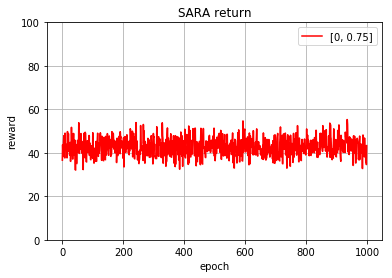

In [56]:
# Plot return
colors = ['r','g','b']
metric = "return"
modes = ["SARA","PLA"]
for mode, c in zip(modes, colors):

    data = all_combined_data[mode]
    length = data.shape[0]
    if length == 0:
        print("No data from {}".format(mode))
        continue
    label = "[0, "+itv.replace("point","0.")+"]"
    
    plt.figure()
    plt.grid()
    plt.fill_between(data.index, data[metric+"_avg"] - data[metric+"_std"],
                 data[metric+'_avg'] + data[metric+'_std'], alpha=0.2,
                 color=c)
    plt.plot(data.index, data[metric+'_avg'], '-', color=c,
         label=label)
    plt.legend(loc="best")
    plt.ylim([0,100])
    plt.title('{} {}'.format(mode,metric))
    plt.xlabel("epoch")
    plt.ylabel("reward")
    plt.savefig(pic_dir+"{}_{}_{}.png".format(itv,mode,metric), bbox_inches='tight')
    
#     plt.figure()
#     plt.grid()
#     for i in range(4):
#         plt.plot(data.index, data[metric+'_run'+str(i)], '-', label=label)


### 2. V_mean

No data from PLA


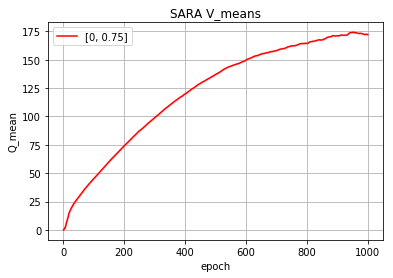

In [57]:
colors = ['r','g','b']
metric = "V_means"
modes = ["SARA","PLA"]
for mode, c in zip(modes, colors):

    data = all_combined_data[mode]
    length = data.shape[0]
    if length == 0:
        print("No data from {}".format(mode))
        continue
    label = "[0, "+itv.replace("point","0.")+"]"
    
    plt.figure()
    plt.grid()
    plt.fill_between(np.linspace(1,1000,length), data[metric+"_avg"] - data[metric+"_std"],
                 data[metric+'_avg'] + data[metric+'_std'], alpha=0.2,
                 color=c)
    plt.plot(np.linspace(1,1000,length), data[metric+'_avg'], '-', color=c,
         label=label)
    plt.legend(loc="best")
#     plt.ylim([0,27])
    plt.title('{} {}'.format(mode,metric))
    plt.xlabel("epoch")
    plt.ylabel("Q_mean")
    plt.savefig(pic_dir+'/{}_{}_{}.png'.format(itv,mode,metric), bbox_inches='tight')
    

(0, 4)